# Car Price Prediction with Machine Learning

##### The cost of a vehicle is influenced by various factors, including the brand's reputation, car features, horsepower, mileage, and more. Predicting car prices is a significant research domain in machine learning. If you're interested in learning how to train a model for predicting car prices, this project is suitable for you.

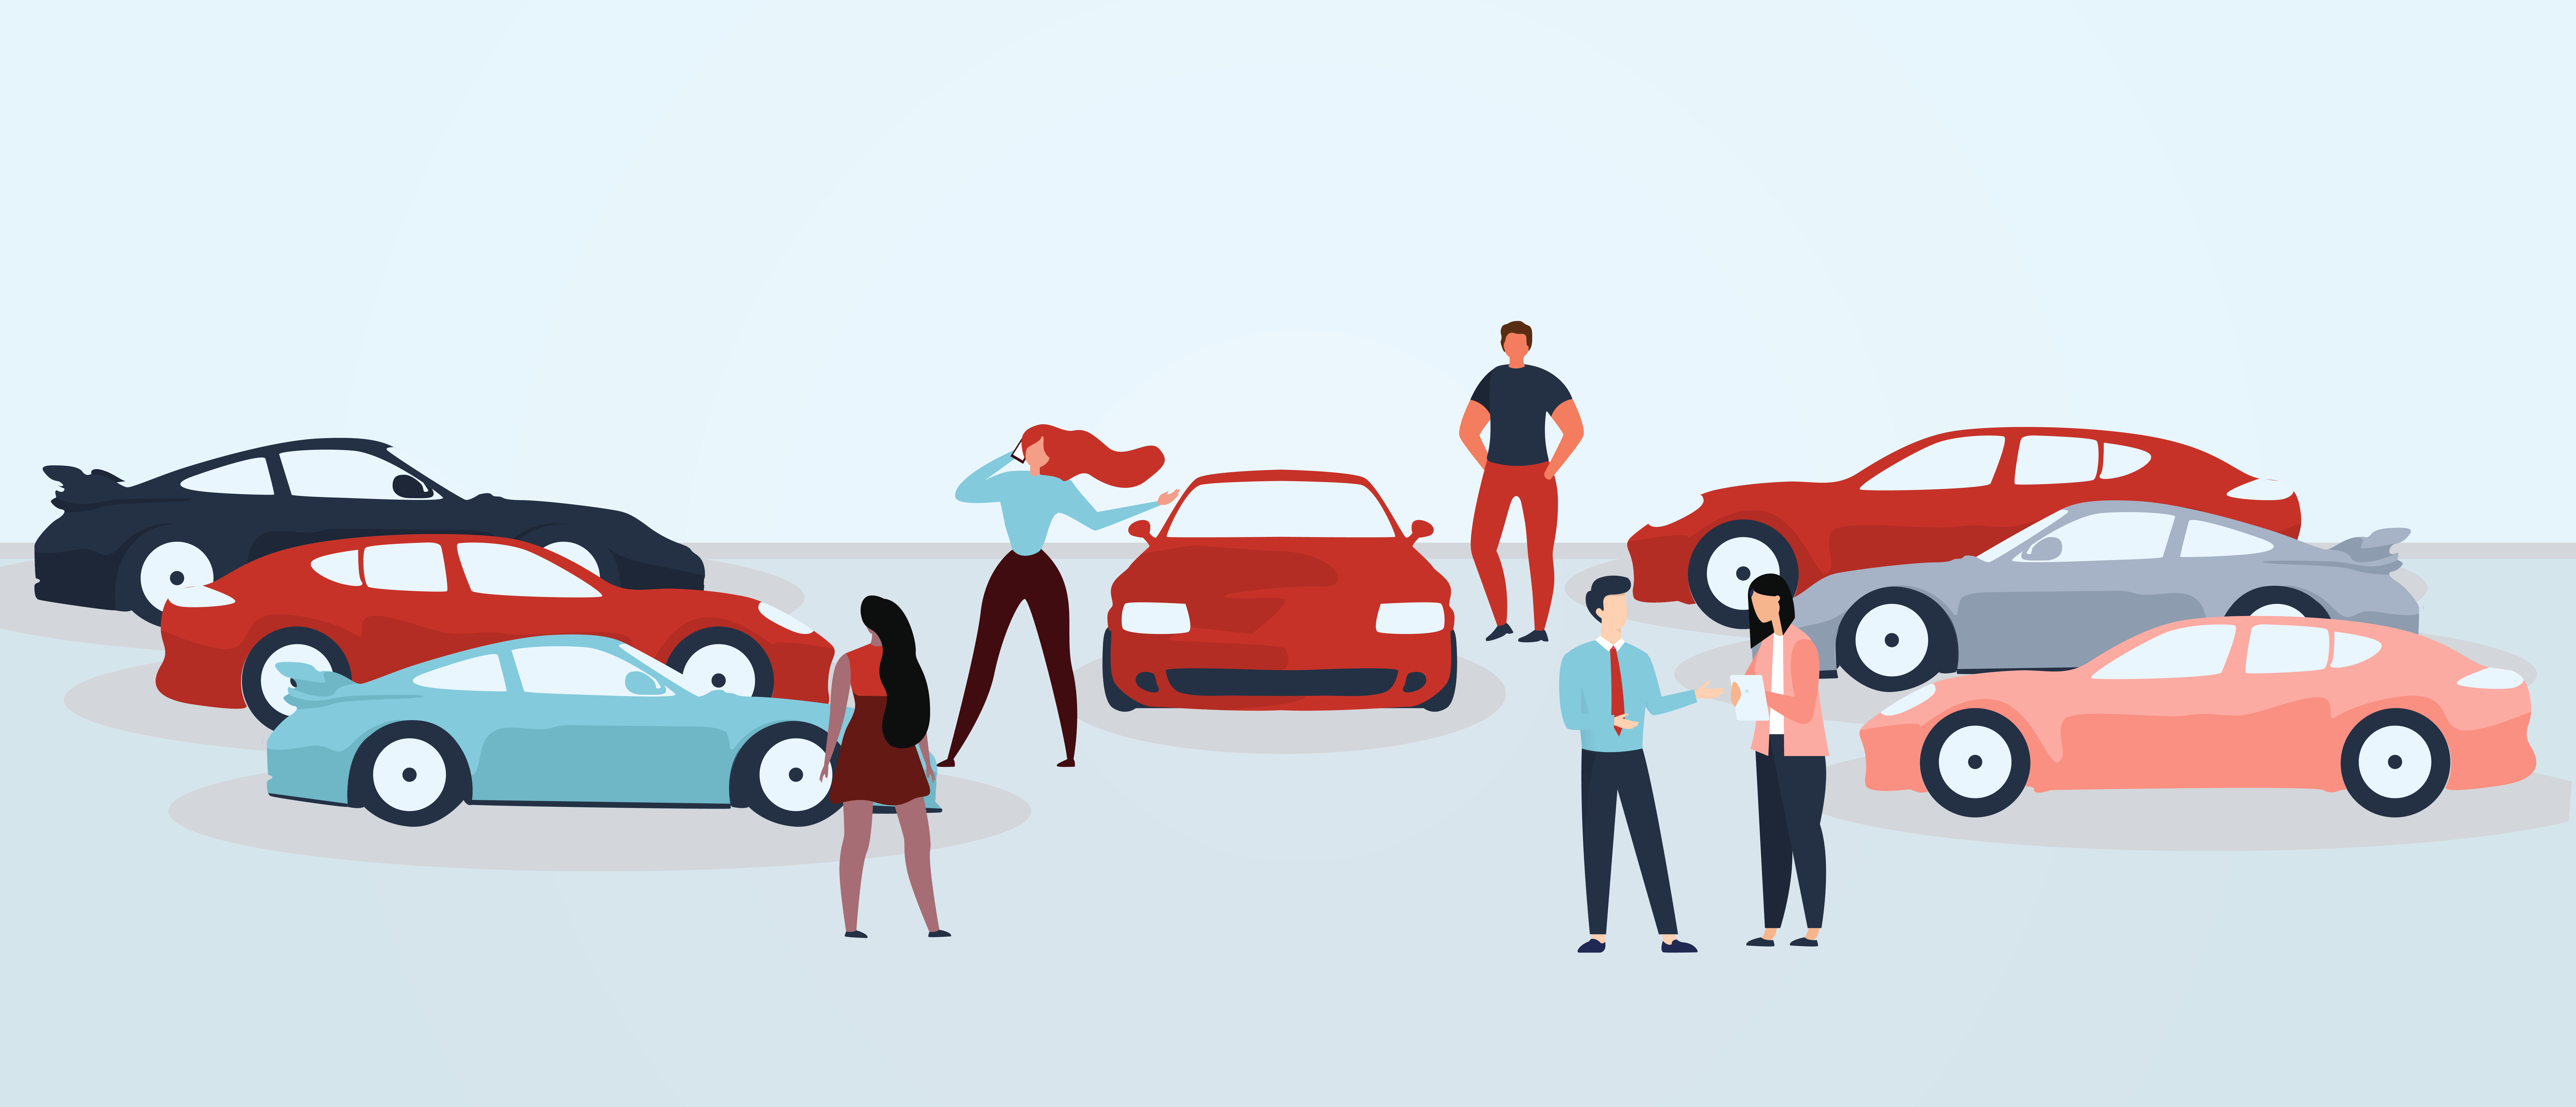

### Importing all important libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv(r"D:\VAI STUDY\DATA ANALYTICS\Internships\Oasis Infobyte\Car Price Prediction/Car Price data.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data = data.drop_duplicates()

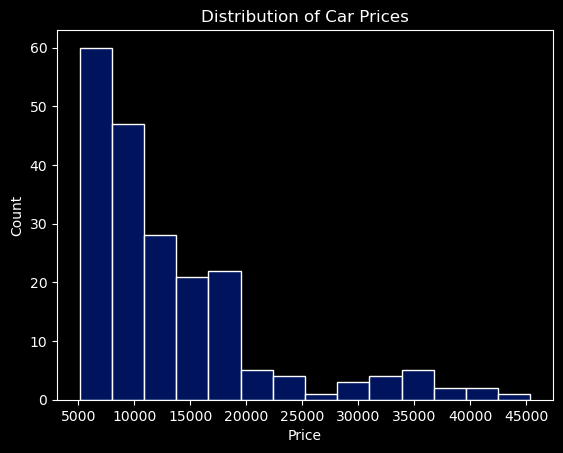

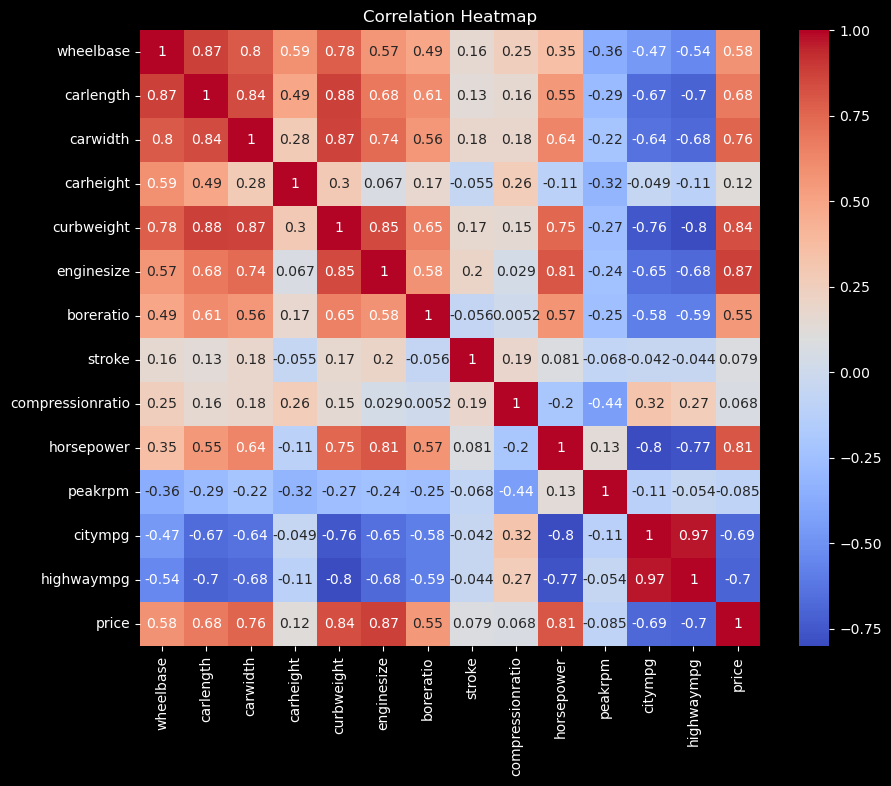

In [11]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of Car Prices', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Correlation Heatmap
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                    'peakrpm', 'citympg', 'highwaympg', 'price']
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [12]:
feature_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                'citympg', 'highwaympg']
target_col = 'price'
x = data[feature_cols]
y = data[target_col]

In [13]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
for col in x.columns:
  if x[col].dtype =='object':
    x[col] = label_encoder.fit_transform(x[col])

#### Data Splitting

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Fitting the model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Evaluation of the model

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3989.5350262204233


#### Prediction

In [19]:
import pandas as pd

# Assuming you have a trained model named 'model' and a DataFrame named 'x_train'
# Replace 'model' and 'x_train' with your actual model and training data
new_car_data = [[3, 'gas', 'std', 'two', 'sedan', 'fwd', 'front', 100.0, 180.0, 68.0, 56.0, 2500, 'ohc', 'four',
                 120, 'mpfi', 3.50, 2.80, 8.5, 110, 5500, 30, 38]]
feature_cols = ['num_doors', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'engine_location',
                'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
                'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
                'peak_rpm', 'city_mpg', 'highway_mpg', 'symboling']

new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)

new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)

# Replace 'x_train' with your actual training data columns
new_car_encoded = new_car_encoded.reindex(columns=x_train.columns, fill_value=0)

predicted_price = model.predict(new_car_encoded)
predicted_price_positive = abs(predicted_price)  # Ensure positive output

print("Predicted Price:", predicted_price_positive)

Predicted Price: [54893.6714772]
